In [150]:
from torch.autograd import Variable
import torch
import numpy as np
w = Variable(torch.Tensor([1.0]), requires_grad = True)

x_data = [1.0, 2.0, 3.0]
y_data = [2.0,4.0, 6.0]

def forward(x):
    return x * w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) *(y_pred - y)


for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        l = loss(x_val, y_val)
        l.backward()
        print('\t grad : ', x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data

        w.grad.data.zero_()

    print('progress : ' ,epoch, l.data[0])

	 grad :  1.0 2.0 tensor(-2.)
	 grad :  2.0 4.0 tensor(-7.8400)
	 grad :  3.0 6.0 tensor(-16.2288)
progress :  0 tensor(7.3159)
	 grad :  1.0 2.0 tensor(-1.4786)
	 grad :  2.0 4.0 tensor(-5.7962)
	 grad :  3.0 6.0 tensor(-11.9981)
progress :  1 tensor(3.9988)
	 grad :  1.0 2.0 tensor(-1.0932)
	 grad :  2.0 4.0 tensor(-4.2852)
	 grad :  3.0 6.0 tensor(-8.8704)
progress :  2 tensor(2.1857)
	 grad :  1.0 2.0 tensor(-0.8082)
	 grad :  2.0 4.0 tensor(-3.1681)
	 grad :  3.0 6.0 tensor(-6.5580)
progress :  3 tensor(1.1946)
	 grad :  1.0 2.0 tensor(-0.5975)
	 grad :  2.0 4.0 tensor(-2.3422)
	 grad :  3.0 6.0 tensor(-4.8484)
progress :  4 tensor(0.6530)
	 grad :  1.0 2.0 tensor(-0.4417)
	 grad :  2.0 4.0 tensor(-1.7316)
	 grad :  3.0 6.0 tensor(-3.5845)
progress :  5 tensor(0.3569)
	 grad :  1.0 2.0 tensor(-0.3266)
	 grad :  2.0 4.0 tensor(-1.2802)
	 grad :  3.0 6.0 tensor(-2.6500)
progress :  6 tensor(0.1951)
	 grad :  1.0 2.0 tensor(-0.2414)
	 grad :  2.0 4.0 tensor(-0.9465)
	 grad :  3.0 6.0

In [151]:
import torch
from torch.autograd import Variable

x_data = torch.tensor([[1.0],[2.0], [3.0]])
y_data = torch.tensor([[2.0],[4.0], [6.0]])

x_data.size()
y_data.size()

torch.Size([3, 1])

In [152]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1,1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = Model()
print(model)

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [153]:
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [154]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [155]:
losses = []
for epoch in range(500):
    y_pred = model(x_data)
    print(y_pred)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data)
    losses.append(loss.data.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

tensor([[0.1331],
        [0.8306],
        [1.5281]], grad_fn=<AddmmBackward0>)
0 tensor(33.5284)
tensor([[0.1954],
        [0.9361],
        [1.6768]], grad_fn=<AddmmBackward0>)
1 tensor(31.3339)
tensor([[0.2556],
        [1.0381],
        [1.8206]], grad_fn=<AddmmBackward0>)
2 tensor(29.2831)
tensor([[0.3138],
        [1.1367],
        [1.9596]], grad_fn=<AddmmBackward0>)
3 tensor(27.3665)
tensor([[0.3700],
        [1.2320],
        [2.0940]], grad_fn=<AddmmBackward0>)
4 tensor(25.5754)
tensor([[0.4244],
        [1.3242],
        [2.2239]], grad_fn=<AddmmBackward0>)
5 tensor(23.9015)
tensor([[0.4770],
        [1.4132],
        [2.3495]], grad_fn=<AddmmBackward0>)
6 tensor(22.3371)
tensor([[0.5278],
        [1.4993],
        [2.4709]], grad_fn=<AddmmBackward0>)
7 tensor(20.8752)
tensor([[0.5769],
        [1.5826],
        [2.5883]], grad_fn=<AddmmBackward0>)
8 tensor(19.5089)
tensor([[0.6244],
        [1.6631],
        [2.7017]], grad_fn=<AddmmBackward0>)
9 tensor(18.2320)
tensor([[0

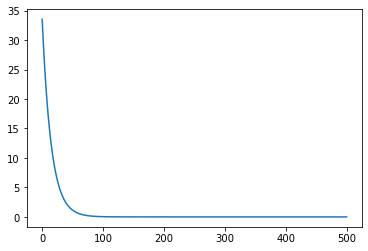

In [156]:
import matplotlib.pyplot as plt

plt.plot(range(500), losses)
plt.show()

In [159]:
hour_var = Variable(torch.Tensor([4.0]))


print('predict (after training)', 4, model.forward(hour_var).data.item)

predict (after training) 4 <built-in method item of Tensor object at 0x168f38310>


### 파이썬 Call 공부

In [ ]:
class Calc:
    def __init__(self, n1, n2):
        self.n1 = n1
        self.n2 = n2

    def __call__(self):
        print('call호출')
        return self.forward()

    def forward(self):
        return '부모 신경망'

class Mul(Calc):
    def __init__(self, n1, n2):
        #super().__init__()
        self.n1 = n1
        self.n2 = n2
        #self.n3 = 100

    def forward(self):
        return '자식 신경망'



s = Calc(1,2)
m =Mul(60,50)

print(m(), s())